In [2]:
import torch
torch.cuda.is_available()
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pip install torchvision


Note: you may need to restart the kernel to use updated packages.


In [4]:
from torchvision import datasets,transforms

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))])
trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

<class 'torch.Tensor'>
torch.Size([64])
torch.Size([64, 1, 28, 28])


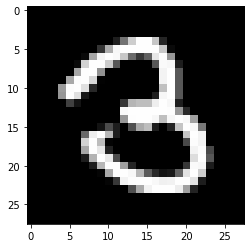

In [6]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(type(images))
print(labels.shape)
print(images.shape)
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')

In [7]:
#Neural Network manually
def activation(x):
    return 1/(1+torch.exp(-x))

#flatten the input images
inputs=images.view(images.shape[0],-1)   #.shape[0] gives the number of batches

#input Layer-
w1=torch.randn(784,256)
b1=torch.randn(256)

#Hidden layer
w2=torch.randn(256,10)
b2=torch.randn(10)

#output of hidden layer
h=activation(torch.matmul(inputs,w1)+b1)

#output
output=(torch.matmul(h,w2)+b2)

print(output.shape)
print(output)


torch.Size([64, 10])
tensor([[-3.4287e+00,  6.2292e-02,  1.6951e+01, -2.1927e+00, -6.9775e+00,
          1.2195e+01,  1.7988e+00, -2.3882e+01,  1.4688e+01,  7.5675e+00],
        [ 6.6303e+00,  1.3622e+01,  4.0774e+00,  4.1734e+00, -2.8858e+00,
          1.2221e+01,  4.5406e+00, -2.9323e+01,  9.0857e+00,  1.5256e+01],
        [ 1.6071e+00, -1.2620e+01,  9.3689e+00,  4.5671e+00, -9.3664e+00,
          1.6355e+01, -1.5814e+00, -2.2385e+01,  1.7468e+01,  4.6160e+00],
        [-2.8793e+00, -3.4422e+00,  1.8284e+01, -2.8824e+00, -8.8658e+00,
          8.1209e+00, -2.4792e+00, -1.4787e+01,  1.7896e+01,  3.7805e+00],
        [ 4.1878e-01, -5.4900e+00, -2.2180e+00, -4.9449e+00, -1.5710e+00,
          1.9174e+01,  9.1027e+00, -1.4599e+01,  1.3162e+01,  1.0750e+01],
        [-9.7367e-01,  2.3784e+00,  9.8430e+00,  1.5186e+00, -8.3415e+00,
          1.2261e+01, -2.9849e+00, -1.6896e+01,  4.9900e+00,  7.9156e+00],
        [ 2.7030e+00, -1.1261e+01,  2.0352e+01, -7.5383e+00, -4.8512e+00,
          9

In [8]:
#implementing softmax
#dim=dimension
#dim=1 gives sum across the columns
#dim=0 gives sum across the rows
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).reshape(-1,1)
    
probability=softmax(output)
print(probability.shape)
print(probability.sum(dim=1))
print(probability)
        

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
tensor([[1.2669e-09, 4.1578e-08, 8.9876e-01, 4.3603e-09, 3.6435e-11, 7.7239e-03,
         2.3606e-07, 1.6602e-18, 9.3440e-02, 7.5566e-05],
        [1.4405e-04, 1.5671e-01, 1.1215e-05, 1.2345e-05, 1.0610e-08, 3.8597e-02,
         1.7821e-05, 3.5008e-20, 1.6782e-03, 8.0283e-01],
        [9.7358e-08, 6.4516e-14, 2.2870e-04, 1.8787e-06, 1.6696e-12, 2.4730e-01,
         4.0144e-09, 3.7045e-18, 7.5246e-01

In [29]:
#Neural Network using class and objects
#Model1
from torch import nn
from torch import optim

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1=nn.Linear(784,540)
        #self.hidden2=nn.Linear(128,64)
        self.relu=nn.ReLU()
        self.output=nn.Linear(540,10)
        self.softmax=nn.Softmax(dim=1)
        
    def forward(self,x):
        x=self.hidden1(x)
        x=self.relu(x)
        x=self.output(x)
        x=self.softmax(x)
        
        return x
        
        
model1=Classifier()

criterion=nn.NLLLoss()
optimizer=optim.SGD(model1.parameters(),lr=0.01)

epochs=5

for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        images=images.view(images.shape[0],-1)
        optimizer.zero_grad()
        output=model1.forward(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss=running_loss+loss.item()
    
    else:    
        print(f"Training Loss: {running_loss/len(trainloader)}")   
        

Training Loss: -0.3027357599580847
Training Loss: -0.6278992134815594
Training Loss: -0.6982661037683995
Training Loss: -0.7176279549532608
Training Loss: -0.7276010817683327


In [10]:
#Running for loop for certain epochs
#Calculating loss
#Then Optimizing the model by backpropagation
#Updating the weights
#Calculating the training loss

from torch import nn
from torch import optim
model=nn.Sequential(nn.Linear(784,128),
                   nn.ReLU(),
                   nn.Linear(128,64),
                   nn.ReLU(),
                   nn.Linear(64,10),
                   nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

epochs=5

for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        images=images.view(images.shape[0],-1)
        optimizer.zero_grad()
        output=model.forward(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss=running_loss+loss.item()
    
    else:    
        print(f"Training Loss: {running_loss/len(trainloader)}")        
        



Training Loss: 1.0380624791484143
Training Loss: 0.3820012266130081
Training Loss: 0.3230013188872256
Training Loss: 0.2916015040264455
Training Loss: 0.26666828257633424


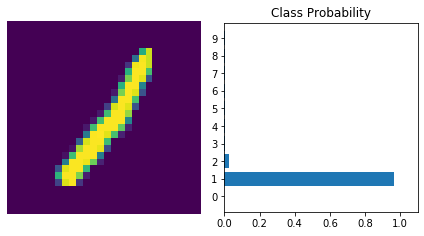

In [40]:
import torch.nn.functional as F

import helper
images,labels=next(iter(trainloader))
img=images[0].view(1,784)
with torch.no_grad():
    logits=model.forward(img)
    
ps=F.softmax(logits,dim=1)
helper.view_classify(img.view(1,28,28),ps) 



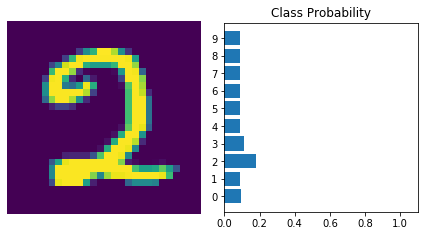

In [39]:
import torch.nn.functional as F

import helper
images,labels=next(iter(trainloader))
img=images[0].view(1,784)
with torch.no_grad():
    logits=model1.forward(img)
    
ps=F.softmax(logits,dim=1)
helper.view_classify(img.view(1,28,28),ps) 

